In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# comparing feature scales

use full to analyse for scale sensitive algorithms like svm

In [5]:
np.random.seed(29)
x = np.random.randn(200)
y=x*10
z = x * 10 + np.random.randn(200) * 2
df = pd.DataFrame([x, y,z]).T
df.columns = ['x', 'y',"z"]

In [6]:
df.describe()

,x,y,z
count,200.000000,200.000000,200.000000
mean,0.003667,0.036674,-0.062261
std,1.008289,10.082888,10.380719
min,-3.505401,-35.054014,-33.737140
25%,-0.605894,-6.058937,-6.248661
50%,0.034232,0.342322,0.014367
75%,0.616292,6.162925,5.734173
max,2.668614,26.686140,26.407039


In [7]:
# you can see the range of values are different, 
# so it means you cannot this data directly to scale sensitive algorithms
# you need to solve this issue first
df.max()-df.min()

x     6.174015
y    61.740155
z    60.144180
dtype: float64

# handling missing data

## complete case analysis imputation
AKA list wise deletion

the technique of creating data frame with removed missing data where the values in any of the variables are missing.

- used when data is missing at random and only a small proportion is missing, in this scenario : original distribution may be preserved. the chance is high
-  if data is missing across many variables, CCA may lead to the removal of a big portion of the
dataset.
- typically if a row contains less than 20%-30% infomration, then you can impute it.
- you check this with.describe() and percentiles


In [8]:
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT',
'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']
df=pd.read_csv("G:/My Drive/Artificial intelligence/data sets/kddcup98-dataset/cup98LRN.txt",usecols=cols)
df.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [9]:
df.isnull().mean().sort_values(ascending=False) # divides by length of df

NUMCHLD     0.870184
MBCOLECT    0.554584
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
WEALTH1     0.468830
AGE         0.248030
INCOME      0.223096
dtype: float64

In [10]:
df_cca=df.dropna() # removing if missing in any 
#df_cca=df.dropna(subset=['NUMCHLD', 'MBCOLECT']) #removing if any missing from subset,doesnt care about others
#df_cca=df.dropna(how='all') # removing if entire row missing 

In [11]:
print('Number of total observations: {}'.format(len(df)))
print('Number of observations with complete cases:{}'.format(len(df_cca)))

Number of total observations: 95412
Number of observations with complete cases:6851


In [12]:
df.describe()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
count,71747.000000,12386.000000,74126.000000,50680.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000
mean,61.611649,1.527773,3.886248,5.345699,0.152075,0.059166,1.116382,0.063932,0.448329,0.126322,0.065722
std,16.664199,0.806861,1.854960,2.742490,0.470023,0.262078,1.669967,0.297344,0.821010,0.380916,0.276398
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,2.000000,5.000000,8.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,98.000000,7.000000,7.000000,9.000000,6.000000,4.000000,9.000000,6.000000,9.000000,5.000000,4.000000


In [13]:
df_cca.describe()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
count,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000
mean,51.503576,1.536564,4.581229,5.761787,0.171070,0.059553,1.056634,0.041892,0.508831,0.110495,0.080134
std,14.036234,0.810838,1.627570,2.682336,0.487734,0.258491,1.556809,0.229559,0.862369,0.357476,0.308281
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,5.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,2.000000,6.000000,8.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,97.000000,7.000000,7.000000,9.000000,4.000000,4.000000,9.000000,4.000000,9.000000,3.000000,3.000000


## mean,median, and mode imputation


- only for features(input data)
- find mean,median,mode on training and apply to train ,test
-if data is centered around mean, use mean imputation else use median imputation , if categorical use mode imputation.
- mean and median distribution may distort the original distribution if there is a high percentage of missing data.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
 df.drop('MAGFAML', axis=1), df['MAGFAML'], test_size=0.3,
 random_state=0)

In [15]:
for var in ['NUMCHLD','INCOME']:
    value = X_train[var].mean()
    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

## arbitrary number imputation

- used for continous distributions (refer to end of distribution imputation)
- find for train and apply for train, test 
- willing choose some absurd single number away from mean,median etc. typical a number much greater than max value.
- use when data is not missing at random , or percentage of missing data is high or when building non linear models.
- Note: this technique distorts the original distribution

In [16]:
X_train[['MBCRAFT','MBGARDEN']].max()

MBCRAFT     6.0
MBGARDEN    4.0
dtype: float64

- choosing 10 since its greater than the one showed below  

In [17]:
for var in ['MBCRAFT','MBGARDEN']:
 X_train[var].fillna(10, inplace=True)
 X_test[var].fillna(10, inplace=True)

## categorical data imputation - bespoke

- replace with "MISSING"

In [18]:
#for var in ['MBCRAFT']:
# X_train[var].fillna('Missing', inplace=True)
# X_test[var].fillna('Missing', inplace=True)


## replacing values with end of distribution 

- its like arbitrary but you have a methd to choose that number
- uses 3 whisk value to replace 
- for continous distribution
- find for train. apply for train , test
- replace values either by end of two tail or one tail 

In [19]:
X_train.isna().mean()

AGE         0.248128
NUMCHLD     0.000000
INCOME      0.000000
WEALTH1     0.469366
MBCRAFT     0.000000
MBGARDEN    0.000000
MBBOOKS     0.554845
MBCOLECT    0.555459
MAGFEM      0.554845
MAGMALE     0.554845
dtype: float64

In [20]:
for var in ['MBCOLECT','MAGFEM','MBBOOKS']:
 IQR = X_train[var].quantile(0.75) - X_train[var].quantile(0.25)

 value = X_train[var].quantile(0.75) + 1.5 * IQR
 
 #value = X_train[var].mean() + 3*X_train[var].std() # this is gausian aproximation based

 X_train[var] = X_train[var].fillna(value)
 X_test[var] = X_test[var].fillna(value)


## replacing values based on sampling

- can be used for continous or categorical data.
- preserves original distribution of that column. but for prediction of series, based on filling multiple columns, it may cause a issue. refer to multivatiate imputation.
- idea is to find number of number of missing values in each column, and take a sample of that size for the distribution and replace nan with sample values
- the count of missing values should be done individually : one for train for test 

In [21]:
number_na = X_train['WEALTH1'].isnull().sum()
random_sample_train = X_train['WEALTH1'].dropna().sample(number_na,
 random_state=0)
random_sample_train.index = X_train[X_train['WEALTH1'].isnull()].index
X_train.loc[X_train['WEALTH1'].isnull(), 'WEALTH1'] = random_sample_train

In [22]:
for var in ['AGE','WEALTH1']:
 # extract a random sample
 random_sample_train = X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=0)
 random_sample_test = X_train[var].dropna().sample(X_test[var].isnull().sum(), random_state=0)
 # re-index the randomly extracted sample
 random_sample_train.index = X_train[X_train[var].isnull()].index
 random_sample_test.index = X_test[X_test[var].isnull()].index
 # replace the NA
 X_train.loc[X_train[var].isnull(), var] = random_sample_train
 X_test.loc[X_test[var].isnull(), var] = random_sample_test

## Algorithm based imputation

- use MICE technique impute based on that

## multivariate imputation by chained equations

1. A simple univariate imputation is performed for every variable with missing
data, for example, median imputation.
2. One specific variable is selected, say, var_1, and the missing values are set back
to missing.
3. A model that's used to predict var_1 is built based on the remaining variables in the dataset. this is typically bayesian ridge,decision tree regressor, extra trees regresser,kneighboursregressor.
4. The missing values of var_1 are replaced with the new estimates.
5. Repeat step 2 to step 4 for each of the remaining variables.

**this is typically done for about ten times**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [24]:
imputer_bayes = IterativeImputer(
 estimator=BayesianRidge(),
 max_iter=10,
 random_state=0)

imputer_knn = IterativeImputer(
 estimator=KNeighborsRegressor(n_neighbors=5),
 max_iter=10,
 random_state=0)

imputer_nonLin = IterativeImputer(
 estimator=DecisionTreeRegressor(
 max_features='sqrt', random_state=0),
 max_iter=10,
 random_state=0)

imputer_missForest = IterativeImputer(
 estimator=ExtraTreesRegressor(
 n_estimators=10, random_state=0),
 max_iter=10,
 random_state=0)

imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)



IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 random_state=0)

In [25]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 random_state=0)

similarly use transform for test with out fit

In [26]:
X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)


In [ ]:
X_test_bayes = imputer_bayes.transform(X_test)
X_test_knn = imputer_knn.transform(X_test)
X_test_nonLin = imputer_nonLin.transform(X_test)
X_ttest_missForest = imputer_missForest.transform(X_test)

In [28]:
variables=X_train.columns
predictors = [var for var in variables if var !='MAGFAML']
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns =
predictors)

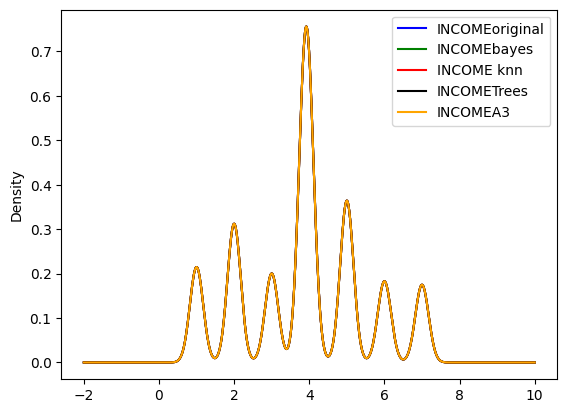

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
var='INCOME' 
X_train[var].plot(kind='kde', ax=ax, color='blue')
X_train_bayes[var].plot(kind='kde', ax=ax, color='green')
X_train_knn[var].plot(kind='kde', ax=ax, color='red')
X_train_nonLin[var].plot(kind='kde', ax=ax, color='black')
X_train_missForest[var].plot(kind='kde', ax=ax, color='orange')
# add legends
lines, labels = ax.get_legend_handles_labels()
labels = [var+'original', var+'bayes', var+' knn',var+ 'Trees',var+ 'A3',
var+'missForest']
ax.legend(lines, labels, loc='best')
plt.show()



# missing value indicator variable 

- it's a common practive to create new series with var+"-NA" varaible (ex: x1_na) to indicate whethere is a impute value or not. you can create a new data frame for it, or do it existing.
- do it seperately for train and test, so you can do better analysis.

In [ ]:
for var in ['AGE','WEALTH1']:
 X_train[var + '_NA'] = np.where(X_train[var].isnull(), 1, 0)
 X_test[var + '_NA'] = np.where(X_test[var].isnull(), 1, 0)

mean of new varaibles and percentage of percentage of missing values in the original should be same

In [ ]:
X_train['A3'].isnull().mean(),X_train['A3_NA'].mean()